In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.0.8'

# 5.1 - Introduction to convnets

This notebook contains the code sample found in Chapter 5, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

First, let's take a practical look at a very simple convnet example. We will use our convnet to classify MNIST digits, a task that you've already been 
through in Chapter 2, using a densely-connected network (our test accuracy then was 97.8%). Even though our convnet will be very basic, its 
accuracy will still blow out of the water that of the densely-connected model from Chapter 2.

The 6 lines of code below show you what a basic convnet looks like. It's a stack of `Conv2D` and `MaxPooling2D` layers. We'll see in a 
minute what they do concretely.
Importantly, a convnet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). 
In our case, we will configure our convnet to process inputs of size `(28, 28, 1)`, which is the format of MNIST images. We do this via 
passing the argument `input_shape=(28, 28, 1)` to our first layer.

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of our convnet so far:

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width 
and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to 
the `Conv2D` layers (e.g. 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are 
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. 
So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

As you can see, our `(3, 3, 64)` outputs were flattened into vectors of shape `(576,)`, before going through two `Dense` layers.

Now, let's train our convnet on the MNIST digits. We will reuse a lot of the code we have already covered in the MNIST example from Chapter 
2.

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 8s - loss: 0.1766 - acc: 0.9440     
Epoch 2/5
60000/60000 [==============================] - 7s - loss: 0.0462 - acc: 0.9855     
Epoch 3/5
60000/60000 [==============================] - 7s - loss: 0.0322 - acc: 0.9902     
Epoch 4/5
60000/60000 [==============================] - 7s - loss: 0.0241 - acc: 0.9926     
Epoch 5/5
60000/60000 [==============================] - 7s - loss: 0.0187 - acc: 0.9943     


Let's evaluate the model on the test data:

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

 9536/10000 [===========================>..] - ETA: 0s

In [9]:
test_acc

0.99129999999999996

While our densely-connected network from Chapter 2 had a test accuracy of 97.8%, our basic convnet has a test accuracy of 99.3%: we 
decreased our error rate by 68% (relative). Not bad! 

### Find predict value and label value

In [10]:
import random
import matplotlib.pyplot as plt

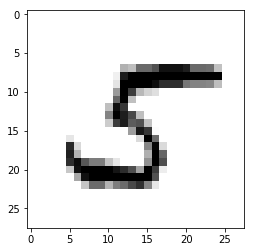

predict value :  5
label value :  5


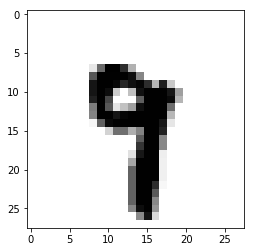

predict value :  9
label value :  9


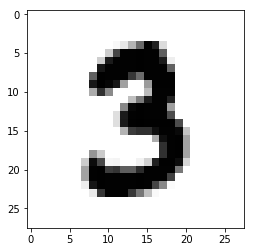

predict value :  3
label value :  3


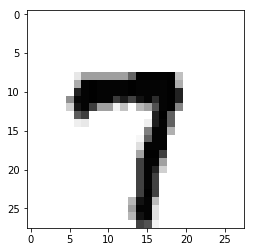

predict value :  7
label value :  7


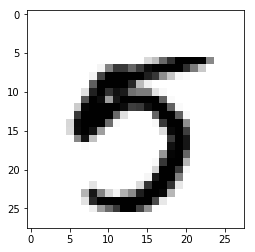

predict value :  5
label value :  5


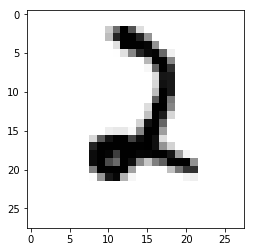

predict value :  2
label value :  2


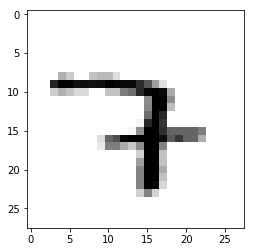

predict value :  7
label value :  7


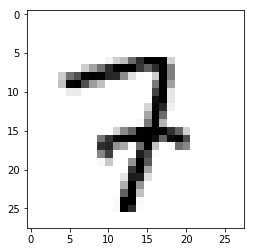

predict value :  7
label value :  7


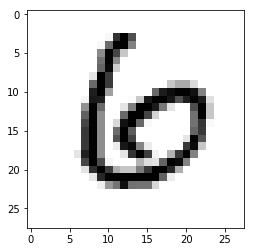

predict value :  6
label value :  6


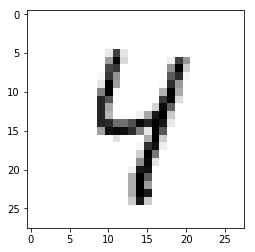

predict value :  4
label value :  4


In [11]:
for i in range(10):
    r = random.randint(0, len(test_images) -1)
    img = test_images[r].reshape((28, 28))
    img = img.astype('float32') * 255
    img = img.astype('uint8')
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()
    print("predict value : ",int(model.predict_classes(test_images[r].reshape((1, 28, 28, 1)))))
    print("label value : ",list(test_labels[r]).index(1.0))

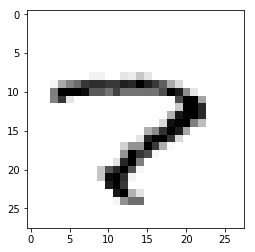

predict value :  2
label value :  7


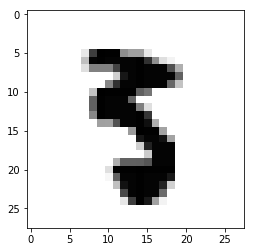

predict value :  5
label value :  3


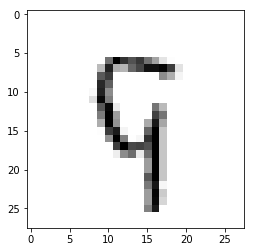

predict value :  5
label value :  9


In [12]:
for i in range(1000):
    r = random.randint(0, len(test_images) -1)
    if int(model.predict_classes(test_images[r].reshape((1, 28, 28, 1)))) != list(test_labels[r]).index(1.0):
        img = test_images[r].reshape((28, 28))
        img = img.astype('float32') * 255
        img = img.astype('uint8')
        plt.imshow(img, cmap=plt.cm.binary)
        plt.show()
        print("predict value : ",int(model.predict_classes(test_images[r].reshape((1, 28, 28, 1)))))
        print("label value : ",list(test_labels[r]).index(1.0))